In [21]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import datetime as dt
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temperatures = session.query(Measurement).filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
june_temperatures_list = [temps.tobs for temps in june_temperatures]
print(june_temperatures_list)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temperatures_df = pd.DataFrame(june_temperatures_list, columns=['June Temps'])
print(june_temperatures_df)

      June Temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temperatures_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temperatures = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
december_temperatures_list = [temps.tobs for temps in december_temperatures]
print(december_temperatures_list)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temperatures_df = pd.DataFrame(december_temperatures_list, columns=["December Temps"])
print(december_temperatures_df)

      December Temps
0               76.0
1               74.0
2               74.0
3               64.0
4               64.0
...              ...
1512            71.0
1513            71.0
1514            69.0
1515            65.0
1516            65.0

[1517 rows x 1 columns]


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temperatures_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Queries for Weather Data in June

In [12]:
# Find the most active station
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Perform a query for station with the highest number of temperature observations and query June temps observation data
june_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date) == 6).all()

print(june_results)

[(71.0,), (71.0,), (72.0,), (72.0,), (76.0,), (77.0,), (71.0,), (73.0,), (73.0,), (75.0,), (81.0,), (74.0,), (77.0,), (70.0,), (69.0,), (70.0,), (72.0,), (71.0,), (77.0,), (76.0,), (74.0,), (74.0,), (74.0,), (74.0,), (71.0,), (80.0,), (77.0,), (72.0,), (72.0,), (73.0,), (72.0,), (73.0,), (73.0,), (77.0,), (76.0,), (79.0,), (78.0,), (82.0,), (79.0,), (76.0,), (74.0,), (74.0,), (73.0,), (79.0,), (77.0,), (73.0,), (72.0,), (72.0,), (73.0,), (74.0,), (77.0,), (73.0,), (73.0,), (72.0,), (72.0,), (67.0,), (71.0,), (73.0,), (78.0,), (71.0,), (72.0,), (70.0,), (72.0,), (73.0,), (74.0,), (81.0,), (72.0,), (77.0,), (69.0,), (69.0,), (69.0,), (78.0,), (78.0,), (73.0,), (72.0,), (71.0,), (72.0,), (72.0,), (73.0,), (71.0,), (70.0,), (71.0,), (68.0,), (72.0,), (71.0,), (78.0,), (81.0,), (74.0,), (74.0,), (73.0,), (73.0,), (72.0,), (73.0,), (77.0,), (73.0,), (73.0,), (75.0,), (72.0,), (72.0,), (73.0,), (73.0,), (75.0,), (72.0,), (73.0,), (70.0,), (69.0,), (68.0,), (75.0,), (74.0,), (73.0,), (70.0,), 

In [19]:
# Convert June temperature observation results for the most active station to a DataFrame
active_station_june_df = pd.DataFrame(june_results, columns=['June Temps'])
active_station_june_df

,June Temps
0,71.0
1,71.0
2,72.0
3,72.0
4,76.0
...,...
231,73.0
232,76.0
233,77.0
234,76.0


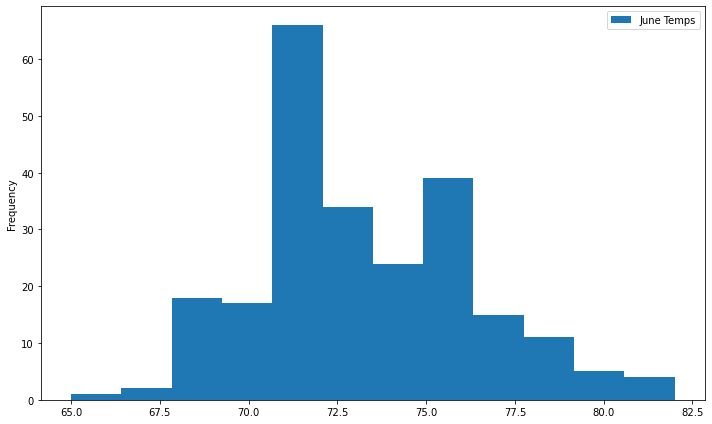

In [22]:
# Plot a histogram for June Temps of the most active station
active_station_june_df.plot.hist(bins=12, figsize=(10,6))
plt.tight_layout()

In [30]:
# Perform a query to retrieve the precipitation scores for the month of June as a list
june_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
# Convert the list of precipitation for the month of June to a DataFrame
june_prcp_df = pd.DataFrame(june_prcp, columns=['June Prcp'])
# Generate the summary statistics for June percipitation DataFrame
june_prcp_df.describe()

,June Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## D3: Additional Queries for Weather Data in December

In [25]:
# Perform a query for station with the highest number of temperature observations and query December temps observation data
december_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date) == 12).all()

print(december_results)

[(72.0,), (71.0,), (72.0,), (74.0,), (66.0,), (61.0,), (58.0,), (60.0,), (71.0,), (65.0,), (72.0,), (70.0,), (68.0,), (67.0,), (71.0,), (65.0,), (64.0,), (65.0,), (69.0,), (70.0,), (70.0,), (68.0,), (69.0,), (71.0,), (70.0,), (71.0,), (76.0,), (71.0,), (72.0,), (73.0,), (77.0,), (67.0,), (69.0,), (72.0,), (74.0,), (71.0,), (70.0,), (68.0,), (70.0,), (66.0,), (72.0,), (70.0,), (70.0,), (70.0,), (70.0,), (73.0,), (71.0,), (69.0,), (73.0,), (72.0,), (71.0,), (69.0,), (70.0,), (69.0,), (70.0,), (75.0,), (71.0,), (70.0,), (69.0,), (71.0,), (65.0,), (67.0,), (72.0,), (67.0,), (76.0,), (67.0,), (72.0,), (69.0,), (66.0,), (75.0,), (74.0,), (72.0,), (72.0,), (72.0,), (68.0,), (74.0,), (73.0,), (73.0,), (72.0,), (70.0,), (70.0,), (71.0,), (70.0,), (72.0,), (65.0,), (62.0,), (73.0,), (71.0,), (70.0,), (62.0,), (69.0,), (69.0,), (66.0,), (72.0,), (73.0,), (70.0,), (66.0,), (64.0,), (65.0,), (73.0,), (74.0,), (67.0,), (73.0,), (70.0,), (67.0,), (71.0,), (78.0,), (69.0,), (63.0,), (64.0,), (66.0,), 

In [26]:
# Convert December temperature observation results to DataFrame
active_station_december_df = pd.DataFrame(december_results, columns=['December Temps'])
active_station_december_df

,December Temps
0,72.0
1,71.0
2,72.0
3,74.0
4,66.0
...,...
212,71.0
213,72.0
214,74.0
215,69.0


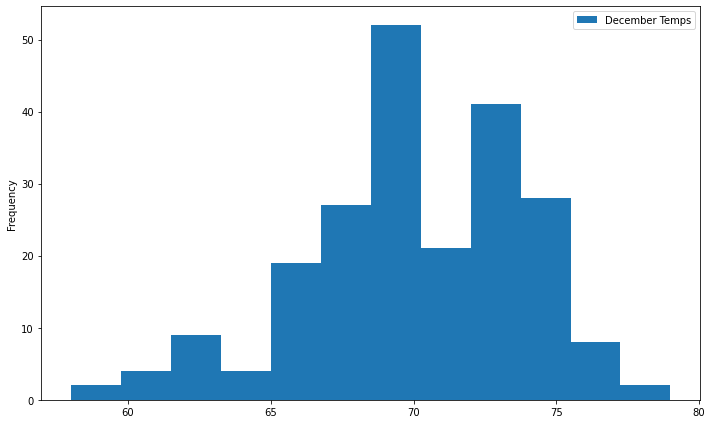

In [27]:
# Plot a histogram for December Temps of the most active station
active_station_december_df.plot.hist(bins=12, figsize=(10,6))
plt.tight_layout()

In [29]:
# Perform a query to retrieve the precipitation scores for the month of December as a list
dec_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
# Convert the list of precipitation for the month of December to a DataFrame
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['December Prcp'])
# Generate the summary statistics for December percipitation DataFrame
dec_prcp_df.describe()

,December Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
